Travail de recherche, rédigé en anglais par convention.
Ce sont juste mes premiers pas dans l'intelligence artificielle, notamment le deep learning et la remodélisation des données.

First we import the necessary libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import openpyxl
# Credits to Machine Learnia (Youtube) for everything he taught me

from mpl_toolkits import mplot3d

Then we can start building

In [26]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
#make_blobs permet de générer des points aux caractéristiques utiles pour nos tests
listx1 =X[:,0].tolist()
listx2 =X[:,1].tolist()
listy =y.tolist()

BaseData = pd.DataFrame({"x1":listx1, "x2":listx2, "y":listy})
BaseData.to_excel('nos_données_sous_excel.xlsx', sheet_name="page1",index=False) #convertion des donnée en fichiers excel pour des manipulations exterieures.

ModuleNotFoundError: No module named 'openpyxl'

Dimension de X:  (100, 2)
Dimension de y:  (100, 1)


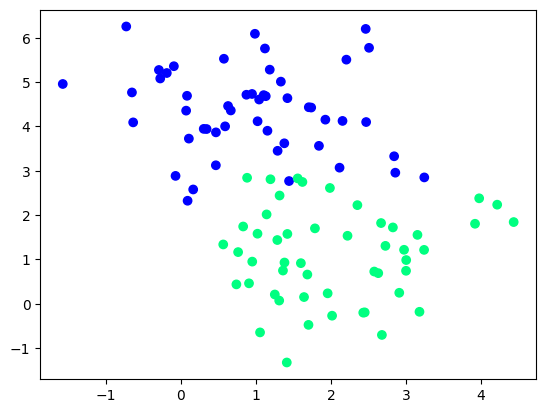

In [15]:
y = y.reshape((y.shape[0], 1))

print("Dimension de X: ", X.shape)
print("Dimension de y: ", y.shape)

plt.scatter(X[:, 0], X[:, 1], s=None, c=y, cmap='winter')
plt.show()

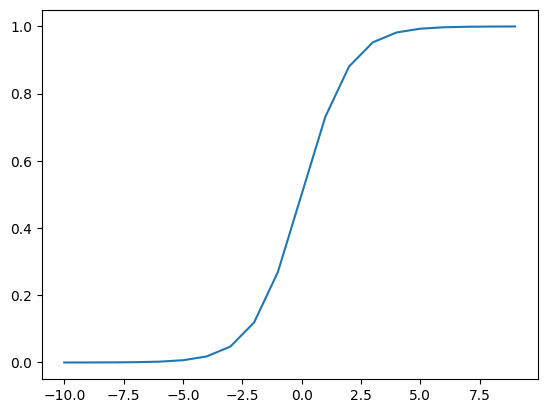

In [16]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    #Génère une matrice 2,1 
    b = np.random.randn(1)
    return (W,b)

def model(X, W, b):
    Z = X.dot(W) + b #produit interne des matrices donne une matrice (100,1)
    A = 1 / (1 + np.exp(-Z)) #notre fonction d'activation est la fonction sigmoïde.
    return A

def fonction_activation(x):
    return 1 / (1 + np.exp(-x)) # sigmoid

t0 = np.arange(-10, 10, 1)
plt.figure(1)
plt.subplot(1,1,1)
plt.plot(t0, fonction_activation(t0))
plt.show()


In [17]:
W, b = initialisation(X)

A = model(X, W, b)
A.shape

(100, 1)

Definition de la fonction cout

In [18]:
def log_loss(A, y):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [19]:
def gradients(A, X, y):
    dW = 1/(len(y)) * np.dot(X.T, A - y) 
    db = 1 / len(y) * np.sum(A - y)
    return dW, db

In [20]:
dW, db = gradients(A, X, y)
db.shape

()

In [21]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW #on avanc e ou on recule dans le gradient selon le signe de la dérivée
    b = b - learning_rate * db
    return W, b
    

In [22]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

from sklearn.metrics import accuracy_score

Rassemblement des fonctions

In [23]:
def artificial_neuron(X, y, learning_rate = 0.5, n_iteration = 100):

    W, b = initialisation(X)
    Loss = []

    for i in range(n_iteration):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    precision = accuracy_score(y,y_pred)
    print("precision: "+str(precision))
    plt.plot(Loss)
    plt.show()

    return (W, b)

precision: 0.92


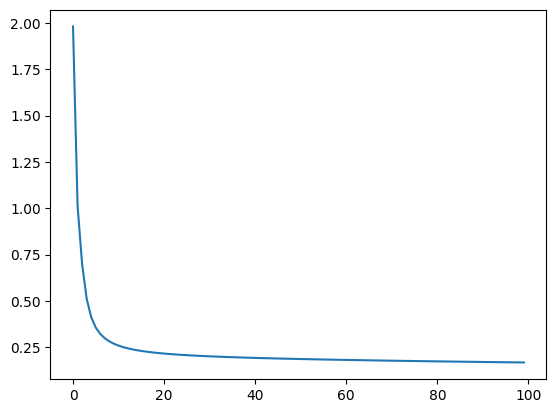

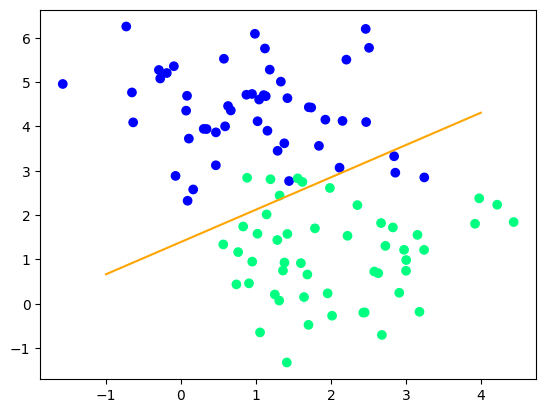

In [24]:
W, b = artificial_neuron(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
x0 = np.linspace(-1,4,5)
x1 = (-x0*W[0]-b)/W[1] #tracer la frontière de décision (fonction d'activation est egale à 0 autrement dit lorseque la fonction sigmoide renvoie 0.5)
plt.plot(x0,x1,c='orange')
plt.show()